In [35]:
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # To split data into training/testing sets
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating the model
import joblib  # For saving the model

In [2]:
data = {
    'HouseSize': [850, 900, 1200, 1500, 1800, 2100, 2500, 2800, 3000, 
                  3200, 3500, 3800, 4000, 4200, 4500, 4800, 5000, 5300, 
                  5500, 5800, 6000, 6300, 6600, 6900, 7200, 7500, 7800, 
                  8000, 8300, 8600, 8900],
    'HousePrice': [150000, 170000, 200000, 240000, 280000, 310000, 350000, 
                   390000, 420000, 440000, 470000, 500000, 530000, 560000, 
                   590000, 620000, 650000, 680000, 710000, 740000, 770000, 
                   800000, 830000, 860000, 890000, 920000, 950000, 980000, 
                   1010000, 1040000, 1070000]
}
# Convert it into a DataFrame for easier handling
df = pd.DataFrame(data)  

In [3]:
df.head()

,HouseSize,HousePrice
0,850,150000
1,900,170000
2,1200,200000
3,1500,240000
4,1800,280000


In [4]:
df.shape

(31, 2)

In [5]:
df.describe()

,HouseSize,HousePrice
count,31.000000,3.100000e+01
mean,4785.483871,6.167742e+05
std,2440.805658,2.780454e+05
min,850.000000,1.500000e+05
25%,2900.000000,4.050000e+05
50%,4800.000000,6.200000e+05
75%,6750.000000,8.450000e+05
max,8900.000000,1.070000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   HouseSize   31 non-null     int64
 1   HousePrice  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


**Split the Dataset into Features (X) and Target (y)**

* X: Independent variable (HouseSize) that we use to make predictions.
* y: Dependent variable (HousePrice) that we want to predict.

In [7]:
X = df[['HouseSize']]  # Feature (independent variable)
y = df['HousePrice']   # Target (dependent variable)

In [8]:
X

,HouseSize
0,850
1,900
2,1200
3,1500
4,1800
5,2100
6,2500
7,2800
8,3000
9,3200


In [9]:
y

0      150000
1      170000
2      200000
3      240000
4      280000
5      310000
6      350000
7      390000
8      420000
9      440000
10     470000
11     500000
12     530000
13     560000
14     590000
15     620000
16     650000
17     680000
18     710000
19     740000
20     770000
21     800000
22     830000
23     860000
24     890000
25     920000
26     950000
27     980000
28    1010000
29    1040000
30    1070000
Name: HousePrice, dtype: int64

In [10]:
df.shape

(31, 2)

**Split Data into Training and Testing Sets**

We divide the data into two sets:

* Training Set: Used to train the model.
* Testing Set: Used to evaluate the model’s performance.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, y_train.shape

((24, 1), (24,))

In [13]:
X_train

,HouseSize
24,7200
12,4000
0,850
4,1800
16,5000
5,2100
13,4200
11,3800
22,6600
1,900


In [14]:
y_train

24     890000
12     530000
0      150000
4      280000
16     650000
5      310000
13     560000
11     500000
22     830000
1      170000
2      200000
25     920000
3      240000
21     800000
26     950000
18     710000
30    1070000
20     770000
7      390000
10     470000
14     590000
28    1010000
19     740000
6      350000
Name: HousePrice, dtype: int64

In [15]:
X_test.shape, y_test.shape

((7, 1), (7,))

**Train the Model**

We fit a Simple Linear Regression model using the training data.

In [16]:
model = LinearRegression()  # Create a Linear Regression model
model.fit(X_train, y_train)  # Train the model on the training data

LinearRegression()

**Make Predictions**

We use the trained model to predict prices for the test set.

In [17]:
X_test

,HouseSize
27,8000
15,4800
23,6900
17,5300
8,3000
9,3200
29,8600


In [18]:
y_pred = model.predict(X_test)  # Predict house prices for test data

In [19]:
print(y_pred)

[ 984068.35248997  618334.98554893  858347.50760399  675480.82413347
  412609.9666446   435468.30207841 1052643.35879142]


**Evaluate the Model**

To assess how well the model performs, we calculate:

* Mean Squared Error (MSE): Measures average squared error.
* R² Score: Measures the proportion of variance explained by the model.

In [20]:
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
r2 = r2_score(y_test, y_pred)  # Calculate R² score
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 39640121.0445
R² Score: 0.9992


In [21]:
lr_results = pd.DataFrame(['Linear Regression', mse, r2]).transpose()
lr_results.columns = ['Method', 'Testing MSE', 'Testing R2']
lr_results

,Method,Testing MSE,Testing R2
0,Linear Regression,39640121.044489,0.999249


**Visualize the Results**

* Scatter Plot: Shows the actual data points.
* Regression Line: Plots the predicted relationship between house size and price.

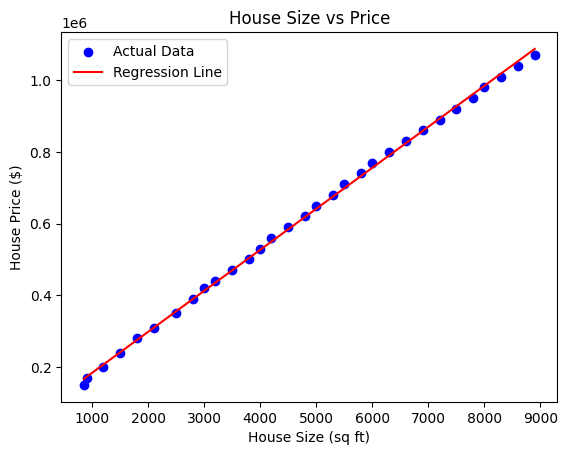

In [22]:
plt.scatter(X, y, color='blue', label='Actual Data')  # Plot actual data points
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot the regression line
plt.title("House Size vs Price")
plt.xlabel("House Size (sq ft)")
plt.ylabel("House Price ($)")
plt.legend()
plt.show()

**Predict for a New House Size**

We can make predictions for a specific house size (e.g., 2000 sq ft).

In [23]:
new_house_size = pd.DataFrame([[5000]], columns=['HouseSize'])  # Example: House size in square feet
predicted_price = model.predict(new_house_size)
print(f"Predicted price for a house of size {new_house_size.iloc[0, 0]} sq ft: ${predicted_price[0]:,.2f}")

Predicted price for a house of size 5000 sq ft: $641,193.32


**Random Forest**

Random Forest Regressor to predict house prices based on house size. Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

Use RandomForestRegressor for training:

In [24]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Predict house prices using the trained model

In [25]:
y_rf_pred = rf_model.predict(X_test)

Evaluate performance using metrics such as Mean Squared Error (MSE) and R² Score

In [26]:
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 39640121.0445
R² Score: 0.9992


In [27]:
rf_results = pd.DataFrame(['Random Forest', rf_mse, rf_r2]).transpose()
rf_results.columns = ['Method', 'Testing MSE', 'Testing R2']
rf_results

,Method,Testing MSE,Testing R2
0,Random Forest,330807142.857143,0.993735


model comparison

In [28]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Testing MSE,Testing R2
0,Linear Regression,39640121.044489,0.999249
1,Random Forest,330807142.857143,0.993735


In [32]:
model.score(X_test, y_test)

0.9992492401317332

In [33]:
rf_model.score(X_test, y_test)

0.9937347132034632

In [29]:
# Example: House size in square feet
new_house_size = pd.DataFrame([[5000]], columns=['HouseSize'])  
predicted_price = rf_model.predict(new_house_size)
print(f"Predicted price for a house of size {new_house_size.iloc[0, 0]} sq ft: ${predicted_price[0]:,.2f}")


Predicted price for a house of size 5000 sq ft: $647,300.00


In [36]:
 # Save the model
joblib.dump(model, 'house_price_prediction_model.pkl') # Save the Linear Regression model

['house_price_prediction_model.pkl']

In [37]:
# Load the model
prediction_model = joblib.load('house_price_prediction_model.pkl')  

In [39]:
# Predict the price of a house with 5000 sq ft
prediction_model.predict(new_house_size)[0]  

641193.3209827461